In [5]:
import pandas as pd
from pathlib import Path

from posydon.popsyn.binarypopulation import BinaryPopulation
from posydon.binary_evol.binarystar import BinaryStar
from posydon.binary_evol.singlestar import SingleStar
from posydon.popsyn.synthetic_population import Population
from posydon.popsyn.synthetic_population import PopulationRunner
from posydon.visualization.plot1D import plot1D
import astropy.units as u

import os
import shutil
from posydon.config import PATH_TO_POSYDON
import pandas as pd 

from POSYDONHRDiagramModule import HR_Diagram

In [6]:
cols = ['time', 'step_names', 'state', 'event', 'S1_state', 'S2_state', 'S1_mass', 'S2_mass', 'orbital_period']
finCols = [
    'orbital_period_f',
    'eccentricity_f',
    'state_f',

    'S2_state_f',
    'S2_mass_f',
    'S2_log_R_f',

    'S1_state_f',
    'S1_mass_f',
    'S1_log_R_f'
 ]

initCols = [
    'orbital_period_i',
    'eccentricity_i',
    'state_i',

    'S2_state_i',
    'S2_mass_i',
    'S2_log_R_i',

    'S1_state_i',
    'S1_mass_i',
    'S1_log_R_i'
 ]

In [7]:
oldPop = Population(r'/home/bku2126/b1095/bku2126/UCXBInvestigation/Project/Analysis/1e+00_Zsun_OldUCXB_subpop.h5')

Missing ini parameter: orbital_separation_scheme
Missing ini parameter: orbital_separation_min
Missing ini parameter: orbital_separation_max


In [8]:
newPop = Population(r'/home/bku2126/b1095/bku2126/UCXBInvestigation/Project/Analysis/1e+00_Zsun_UCXB_subpop.h5')

In [9]:
# XrB_Logic_Oneline = "((S2_state_f == 'BH') | (S2_state_f == 'NS')) & ((S1_state_f != 'BH') & (S1_state_f != 'NS')) | ((S1_state_f == 'BH') | (S1_state_f == 'NS')) & ((S2_state_f != 'BH') & (S2_state_f != 'NS')) & ((state_f == 'initial_RLOF') | (state_f == 'RLO2') | (state_f == 'detached'))"

# XrBs = loadedpop.oneline.select(where=XrB_Logic_Oneline)

# orbitalPeriodMax = 120 * u.minute
# OP_Max_val = orbitalPeriodMax.to(u.day).value
# UCXBs = XrBs[XrBs['orbital_period_f'] < OP_Max_val]

# OldUCXB_Index = UCXBs.index.to_list()

# loadedpop.export_selection(selection=OldUCXB_Index, filename = '1e+00_Zsun_OldUCXB_subpop.h5', append=True)

In [10]:
newPop.oneline['state_f'].value_counts()

state_f     
initial_RLOF    571
contact           9
Name: count, dtype: int64

In [11]:
oldPop.oneline['state_f'].value_counts()

state_f 
detached    239
RLO2        175
Name: count, dtype: int64

In [12]:
newPop.oneline['S2_state_f'].value_counts()

S2_state_f             
stripped_He_non_burning    571
NS                           9
Name: count, dtype: int64

In [13]:
oldPop.oneline['S2_state_f'].value_counts()

S2_state_f                     
stripped_He_Core_He_burning        313
stripped_He_Central_He_depleted     84
WD                                  17
Name: count, dtype: int64

In [14]:
oldPop.oneline['time_f'].describe()

,time_f
count,414.0
mean,100000000.0
std,0.0
min,100000000.0
25%,100000000.0
50%,100000000.0
75%,100000000.0
max,100000000.0


In [15]:
newPop.oneline['time_f'].describe()

,time_f
count,5.800000e+02
mean,5.977545e+07
std,1.626937e+07
min,2.729432e-02
25%,5.150208e+07
50%,6.346439e+07
75%,6.983185e+07
max,9.245182e+07


In [16]:
oldPop.calculate_formation_channels()
newPop.calculate_formation_channels()

Formation channels already exist in the parsed population file!
Channels will be overwriten
Formation channels already exist in the parsed population file!
Channels will be overwriten


In [17]:
oldPop.formation_channels.value_counts()

channel_debug                                       channel                                  
ZAMS_oRLO1_CC1_oRLO2_oCE2_maxtime_END               ZAMS_oRLO1_CC1_oRLO2_oCE2_maxtime_END        389
ZAMS_oRLO1_CC1_oRLO2_oCE2_CC2_maxtime_END           ZAMS_oRLO1_CC1_oRLO2_oCE2_CC2_maxtime_END     17
ZAMS_CC1_oRLO2_oCE2_maxtime_END                     ZAMS_CC1_oRLO2_oCE2_maxtime_END                7
ZAMS_redirect_from_ZAMS_CC1_oRLO2_oCE2_maxtime_END  ZAMS_CC1_oRLO2_oCE2_maxtime_END                1
Name: count, dtype: int64

In [18]:
newPop.formation_channels.value_counts()

channel_debug                                 channel                          
ZAMS_oRLO1_CC1_oRLO2_oCE2_END                 ZAMS_oRLO1_CC1_oRLO2_oCE2_END        567
ZAMS_oRLO1_CC1_oRLO2_oCE2_CC2_CO_contact_END  ZAMS_oRLO1_CC1_oRLO2_oCE2_CC2_END      9
ZAMS_CC1_oRLO2_oCE2_END                       ZAMS_CC1_oRLO2_oCE2_END                4
Name: count, dtype: int64

In [19]:
oldPop.oneline[initCols]

,orbital_period_i,eccentricity_i,state_i,S2_state_i,S2_mass_i,S2_log_R_i,S1_state_i,S1_mass_i,S1_log_R_i
binary_index,,,,,,,,,
0,50.539711,0.0,detached,H-rich_Core_H_burning,6.274045,NaN,H-rich_Core_H_burning,7.582965,NaN
1,87.696726,0.0,detached,H-rich_Core_H_burning,6.223693,NaN,H-rich_Core_H_burning,7.129186,NaN
2,86.125123,0.0,detached,H-rich_Core_H_burning,6.212863,NaN,H-rich_Core_H_burning,7.380109,NaN
3,114.066302,0.0,detached,H-rich_Core_H_burning,6.293251,NaN,H-rich_Core_H_burning,7.966518,NaN
4,658.896817,0.0,detached,H-rich_Core_H_burning,6.282489,NaN,H-rich_Core_H_burning,7.218872,NaN
...,...,...,...,...,...,...,...,...,...
409,64.991563,0.0,detached,H-rich_Core_H_burning,5.724557,NaN,H-rich_Core_H_burning,7.793425,NaN
410,67.628447,0.0,detached,H-rich_Core_H_burning,6.562176,NaN,H-rich_Core_H_burning,8.198150,NaN
411,100.013230,0.0,detached,H-rich_Core_H_burning,5.948707,NaN,H-rich_Core_H_burning,7.776017,NaN


In [20]:
newPop.history

,state,event,time,orbital_period,eccentricity,rl_relative_overflow_1,rl_relative_overflow_2,lg_mtransfer_rate,mass_transfer_case,step_names,...,S2_surface_n14,S2_surface_o16,S2_surf_avg_omega,S2_surf_avg_omega_div_omega_crit,S2_spin,S2_conv_env_top_mass,S2_conv_env_bot_mass,S2_envelope_binding_energy,S2_total_mass_h1,S2_total_mass_he4
binary_index,,,,,,,,,,,,,,,,,,,,,
0,detached,ZAMS,0.000000e+00,17.518876,0.000000,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,RLO1,CC1,4.615464e+07,50.112270,0.000000,0.050406,-0.905528,-4.237505,case_BB1,step_HMS_HMS,...,0.001273,0.005745,1.029421e-04,0.977946,15.216788,6.131804,6.131804,-3.318945e+49,3.734982,2.303677
0,detached,NaN,4.615464e+07,756.227682,0.839012,NaN,NaN,NaN,None,step_SN,...,0.001273,0.005745,1.029421e-04,0.977946,15.216788,6.131804,6.131804,-3.318945e+49,3.734982,2.303677
0,RLO2,oRLO2,6.750167e+07,48.278461,0.000000,-1.000000,-0.050000,NaN,None,step_detached,...,0.000736,0.006088,2.683497e-06,0.679812,15.524217,6.379148,6.379146,-1.518214e+49,3.209310,3.079484
0,RLO2,oCE2,6.750412e+07,10.972604,0.000000,-1.000000,0.071371,-1.591135,case_B1,step_CO_HMS_RLO,...,0.000736,0.006088,2.135762e-07,0.014508,2.147514,5.427573,5.427343,-1.341128e+49,2.524529,2.806279
0,detached,NaN,6.750412e+07,0.032198,0.000000,NaN,NaN,NaN,case_B1,step_CE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,initial_RLOF,NaN,6.750412e+07,0.032198,0.000000,NaN,NaN,NaN,case_B1,step_CO_HeMS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,initial_RLOF,END,6.750412e+07,0.032198,0.000000,NaN,NaN,NaN,case_B1,step_end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,detached,ZAMS,0.000000e+00,21.494727,0.000000,NaN,NaN,NaN,None,initial_cond,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
import matplotlib.pyplot as plt
import numpy as np

In [33]:
x = np.log10(newPop.history['time'].loc[1])
y = np.log10(newPop.history['orbital_period'].loc[1])

/home/bku2126/miniconda/envs/posydon_env_v2.2/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log10


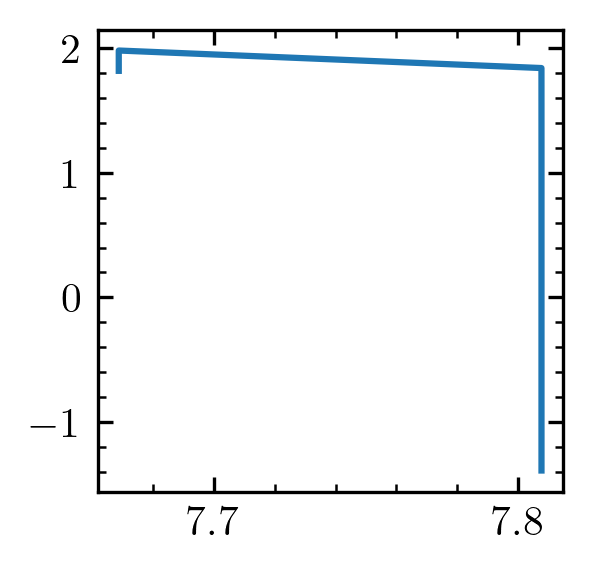

In [34]:
fig, ax = plt.subplots(figsize = (2,2))
ax.plot(x, y)

In [36]:
from posydon.visualization.VHdiagram import VHdiagram
from posydon.visualization.VH_diagram.PresenterMode import PresenterMode


ModuleNotFoundError: No module named 'PyQt5'

In [ ]:
VHdiagram('population.h5', index=19628, presentMode=PresenterMode.DIAGRAM)